In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv('Google_Stocks_dataset.csv') 

In [3]:
df.head(5) 

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
print(df.shape)

(1258, 14)


In [5]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [8]:
df = df[['date','open','close']] 
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) 
df.set_index('date',drop=True,inplace=True)
df.head(5)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


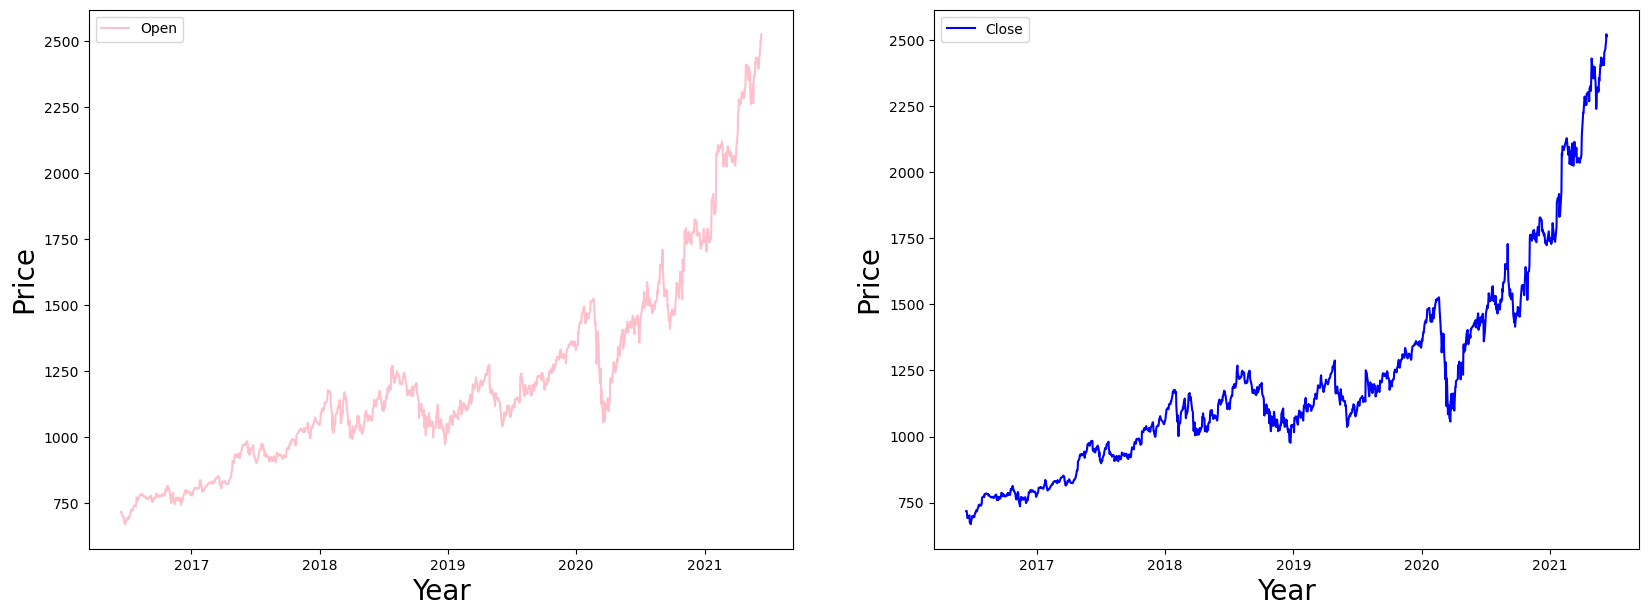

In [9]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='pink')
ax[0].set_xlabel('Year',size=20)
ax[0].set_ylabel('Price',size=20)
ax[0].legend()
ax[1].plot(df['close'],label='Close',color='blue')
ax[1].set_xlabel('Year',size=20)
ax[1].set_ylabel('Price',size=20)
ax[1].legend()
fig.show()


In [10]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [11]:
training_size = round(len(df) * 0.75) 
training_size

944

In [12]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape


((944, 2), (314, 2))

In [13]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [14]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

In [15]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 2s 22ms/step - loss: 0.0056 - mean_absolute_error: 0.0530 - val_loss: 0.0075 - val_mean_absolute_error: 0.0671
Epoch 2/100
28/28 [==============================] - 0s 13ms/step - loss: 7.5941e-04 - mean_absolute_error: 0.0218 - val_loss: 0.0047 - val_mean_absolute_error: 0.0540
Epoch 3/100
28/28 [==============================] - 0s 13ms/step - loss: 4.4350e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0019 - val_mean_absolute_error: 0.0332
Epoch 4/100
28/28 [==============================] - 0s 14ms/step - loss: 4.2443e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0023 - val_mean_absolute_error: 0.0366
Epoch 5/100
28/28 [==============================] - 0s 15ms/step - loss: 4.2330e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0026 - val_mean_absolute_error: 0.0385
Epoch 6/100
28/28 [==============================] - 0s 14ms/step - loss: 3.7937e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0024 - val_mean_absolute_error: 0.0

In [17]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 0s 3ms/step


array([[0.397071  , 0.39218384],
       [0.39655456, 0.39187407],
       [0.39217448, 0.38767612],
       [0.39719617, 0.392234  ],
       [0.40204027, 0.39668587]], dtype=float32)

In [18]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1407.138 , 1395.11  ],
       [1406.1804, 1394.5359],
       [1398.0602, 1386.7557],
       [1407.37  , 1395.203 ],
       [1416.3505, 1403.4537]], dtype=float32)

In [19]:
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [20]:
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1407.137939,1395.109985
2020-05-28,1396.86,1416.73,1406.180420,1394.535889
2020-05-29,1416.94,1428.92,1398.060181,1386.755737
2020-06-01,1418.39,1431.82,1407.369995,1395.203003
2020-06-02,1430.55,1439.22,1416.350464,1403.453735


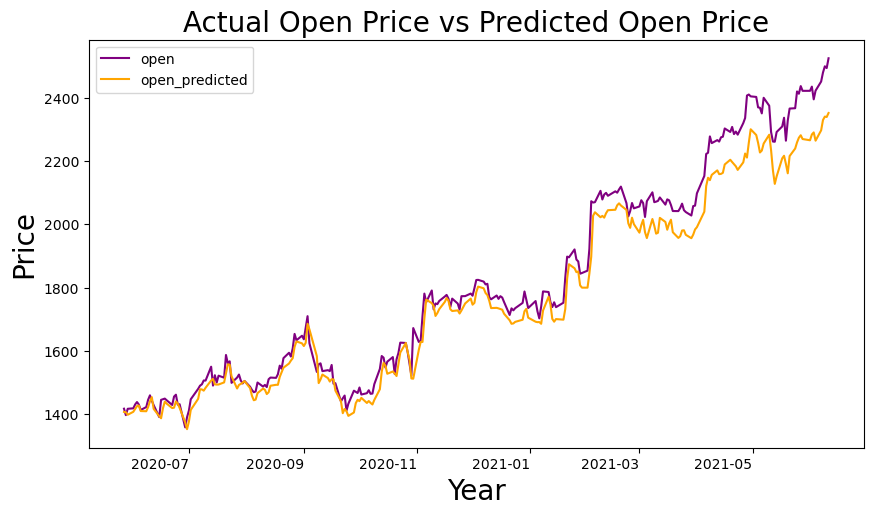

In [26]:
df_merge[['open','open_predicted']].plot(figsize=(10,6),color=['purple','orange'])
plt.xticks(rotation=0)
plt.xlabel('Year',size=20)
plt.ylabel('Price',size=20)
plt.title('Actual Open Price vs Predicted Open Price',size=20)
plt.show()

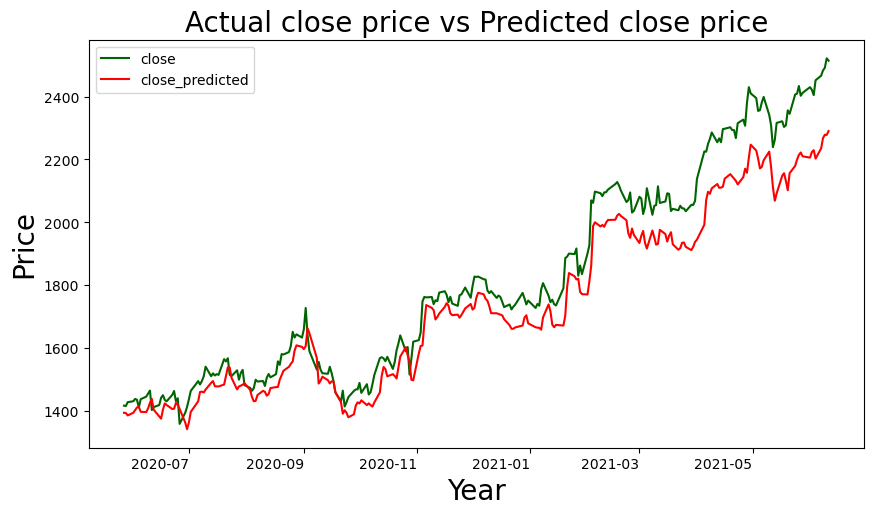

In [28]:
df_merge[['close','close_predicted']].plot(figsize=(10,6),color=['darkgreen','red'])
plt.xticks(rotation=0)
plt.xlabel('Year',size=20)
plt.ylabel('Price',size=20)
plt.title('Actual close price vs Predicted close price',size=20)
plt.show()

In [35]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2340.517334,2278.696777
2021-06-10,2494.01,2521.60,2339.360352,2277.819336
2021-06-11,2524.92,2513.93,2351.916016,2290.353760
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [36]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [37]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)


1/1 [==============================] - 0s 7ms/step


In [38]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

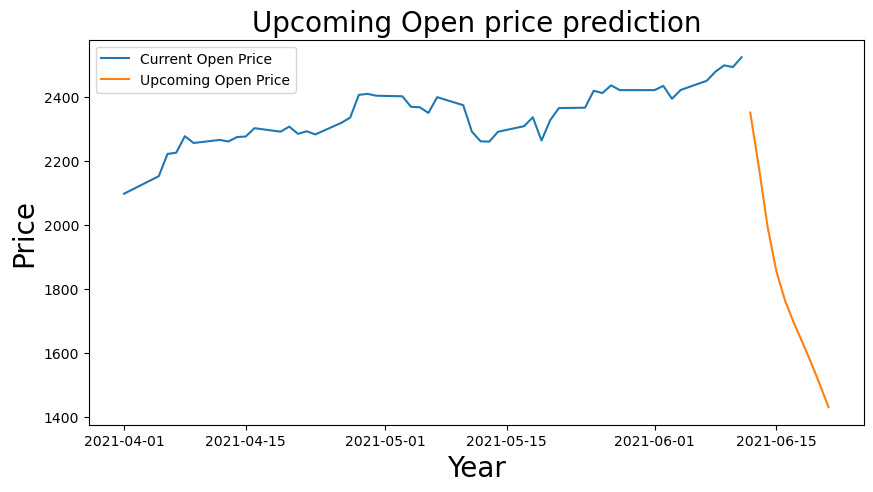

In [39]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_xlabel('Year',size=20)
ax.set_ylabel('Price',size=20)
ax.set_title('Upcoming Open price prediction',size=20)
ax.legend()
fig.show()


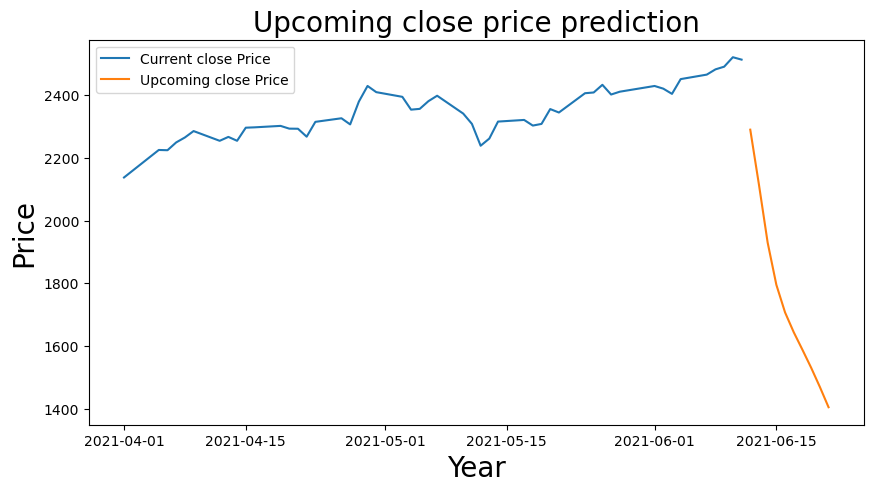

In [41]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_xlabel('Year',size=20)
ax.set_ylabel('Price',size=20)
ax.set_title('Upcoming close price prediction',size=20)
ax.legend()
fig.show()
